### ISM6562 | Big Data
# Project: Occupancy Detection
##### Azeem Syed, Kartikay Bali, Umar Abdullah and Chinmayi Amit Karmalkar

## Dataset Used

### We have used three datasets from Kaggle providing environmental feature related informaiton to detect occupancy in a room. In other words, we tried to find if environmental features affect occupancy in a room. In these datasets occupancy was obtained from time stamped pictures that were taken every minute. 

#### Source of our datasets is https://archive.ics.uci.edu/ml/datasets/Occupancy+Detection+

### In the dataset we have environmental features as contrinuous variables: Light, Temperature, Humidity, Humidity Ratio and CO2 and dependent variable: Occupancy, whether the room is occupied or not based on the presence or absence of the given features.

### Models used: Logistic Regression, Decision Tree, Random Forest, Ensemble using GBT

In [76]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import format_number

In [77]:
spark=SparkSession.builder.appName('Occupancy Project').getOrCreate()

### We have imported .json file with 8143 records as training dataset

In [78]:
OccupancyTraining=spark.read.json("OccupancyData_Train.json",multiLine=True)

In [79]:
OccupancyTraining.show(5)
OccupancyTraining.count()

+------+--------+-------------------+---+-----+---------+-----------+-------------------+
|   CO2|Humidity|      HumidityRatio| ID|Light|Occupancy|Temperature|               date|
+------+--------+-------------------+---+-----+---------+-----------+-------------------+
|721.25|  27.272|0.00479298817650529|  1|426.0|        1|      23.18|2015-02-04 17:51:00|
| 714.0| 27.2675|0.00478344094931065|  2|429.5|        1|      23.15|2015-02-04 17:51:59|
| 713.5|  27.245|0.00477946352442199|  3|426.0|        1|      23.15|2015-02-04 17:53:00|
|708.25|    27.2|0.00477150882608175|  4|426.0|        1|      23.15|2015-02-04 17:54:00|
| 704.5|    27.2|0.00475699293331518|  5|426.0|        1|       23.1|2015-02-04 17:55:00|
+------+--------+-------------------+---+-----+---------+-----------+-------------------+
only showing top 5 rows



8143

In [81]:
OccupancyTraining.printSchema()

root
 |-- CO2: double (nullable = true)
 |-- Humidity: double (nullable = true)
 |-- HumidityRatio: double (nullable = true)
 |-- ID: long (nullable = true)
 |-- Light: double (nullable = true)
 |-- Occupancy: long (nullable = true)
 |-- Temperature: double (nullable = true)
 |-- date: string (nullable = true)



### We have imported .txt file with 2665 records as Testing dataset 1 

In [82]:
OccupancyData_1=spark.read.option("delimiter",",").option("inferSchema",True).option("header",True).csv("OccupancyData_1.txt")

In [83]:
OccupancyData_1.show(5)
OccupancyData_1.count()

+---+-------------------+-----------+--------+----------------+----------------+-------------------+---------+
| ID|               date|Temperature|Humidity|           Light|             CO2|      HumidityRatio|Occupancy|
+---+-------------------+-----------+--------+----------------+----------------+-------------------+---------+
|140|2015-02-02 14:19:00|       23.7|  26.272|           585.2|           749.2|0.00476416302416414|        1|
|141|2015-02-02 14:19:59|     23.718|   26.29|           578.4|           760.4|0.00477266099212519|        1|
|142|2015-02-02 14:21:00|      23.73|   26.23|572.666666666667|769.666666666667|0.00476515255246541|        1|
|143|2015-02-02 14:22:00|    23.7225|  26.125|          493.75|          774.75|0.00474377335599685|        1|
|144|2015-02-02 14:23:00|     23.754|    26.2|           488.6|           779.0|0.00476659399998615|        1|
+---+-------------------+-----------+--------+----------------+----------------+-------------------+---------+
o

2665

In [84]:
OccupancyData_1.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- date: timestamp (nullable = true)
 |-- Temperature: double (nullable = true)
 |-- Humidity: double (nullable = true)
 |-- Light: double (nullable = true)
 |-- CO2: double (nullable = true)
 |-- HumidityRatio: double (nullable = true)
 |-- Occupancy: integer (nullable = true)



### We have imported .csv file with 9752 records as Testing dataset 2.

In [85]:
OccupancyData_2=spark.read.csv("OccupancyData_2.csv", inferSchema=True, header=True)
OccupancyData_2.show(5)
OccupancyData_2.count()

+---+---------------+-----------+-----------+-----------+-----------+-------------+---------+
| ID|           Date|Temperature|   Humidity|      Light|        CO2|HumidityRatio|Occupancy|
+---+---------------+-----------+-----------+-----------+-----------+-------------+---------+
|  1|2/11/2015 14:48|      21.76|31.13333333|437.3333333|1029.666667|  0.005021011|        1|
|  2|2/11/2015 14:49|      21.79|       31.0|437.3333333|     1000.0|  0.005008581|        1|
|  3|2/11/2015 14:50|    21.7675|    31.1225|      434.0|    1003.75|  0.005021569|        1|
|  4|2/11/2015 14:51|    21.7675|    31.1225|      439.0|     1009.5|  0.005021569|        1|
|  5|2/11/2015 14:51|      21.79|31.13333333|437.3333333|1005.666667|  0.005030298|        1|
+---+---------------+-----------+-----------+-----------+-----------+-------------+---------+
only showing top 5 rows



9752

In [86]:
OccupancyData_2.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- Date: string (nullable = true)
 |-- Temperature: double (nullable = true)
 |-- Humidity: double (nullable = true)
 |-- Light: double (nullable = true)
 |-- CO2: double (nullable = true)
 |-- HumidityRatio: double (nullable = true)
 |-- Occupancy: integer (nullable = true)



In [87]:
OccupancyTraining.show(5)

+------+--------+-------------------+---+-----+---------+-----------+-------------------+
|   CO2|Humidity|      HumidityRatio| ID|Light|Occupancy|Temperature|               date|
+------+--------+-------------------+---+-----+---------+-----------+-------------------+
|721.25|  27.272|0.00479298817650529|  1|426.0|        1|      23.18|2015-02-04 17:51:00|
| 714.0| 27.2675|0.00478344094931065|  2|429.5|        1|      23.15|2015-02-04 17:51:59|
| 713.5|  27.245|0.00477946352442199|  3|426.0|        1|      23.15|2015-02-04 17:53:00|
|708.25|    27.2|0.00477150882608175|  4|426.0|        1|      23.15|2015-02-04 17:54:00|
| 704.5|    27.2|0.00475699293331518|  5|426.0|        1|       23.1|2015-02-04 17:55:00|
+------+--------+-------------------+---+-----+---------+-----------+-------------------+
only showing top 5 rows



### We have preprocessed our data here by removing few columns, null rows and changing the datatype and  prepared it for modelling

In [88]:
OccupancyTraining=OccupancyTraining.select('ID',format_number('Temperature',2).cast("double").alias('Temperature'),format_number('Humidity',2).cast("double").alias('Humidity'),format_number('Light',2).cast("double").alias('Light'),format_number('CO2',2).cast("double").alias('CO2'),format_number('HumidityRatio',10).cast("double").alias('HumidityRatio'),OccupancyTraining['Occupancy'].cast("int").alias('label'))
OccupancyData_1=OccupancyData_1.select('ID',format_number('Temperature',2).cast("double").alias('Temperature'),format_number('Humidity',2).cast("double").alias('Humidity'),format_number('Light',2).cast("double").alias('Light'),format_number('CO2',2).cast("double").alias('CO2'),format_number('HumidityRatio',10).cast("double").alias('HumidityRatio'),OccupancyData_1['Occupancy'].cast("int").alias('label'))
OccupancyData_2=OccupancyData_2.select('ID',format_number('Temperature',2).cast("double").alias('Temperature'),format_number('Humidity',2).cast("double").alias('Humidity'),format_number('Light',2).cast("double").alias('Light'),format_number('CO2',2).cast("double").alias('CO2'),format_number('HumidityRatio',10).cast("double").alias('HumidityRatio'),OccupancyData_2['Occupancy'].cast("int").alias('label'))

In [89]:
OccupancyTraining=OccupancyTraining.na.drop()
OccupancyData_1=OccupancyData_1.na.drop()
OccupancyData_2=OccupancyData_2.na.drop()

In [90]:
type(OccupancyData_1)

pyspark.sql.dataframe.DataFrame

In [91]:
type(OccupancyData_2)

pyspark.sql.dataframe.DataFrame

In [92]:
type(OccupancyTraining)

pyspark.sql.dataframe.DataFrame

### Visualizing the Data

In [93]:
from pandas import read_csv, read_json

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import datetime as dt
import matplotlib.dates as mdates
from sklearn.preprocessing import scale
#from tpot import TPOTClassifier
%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 11
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['xtick.labelsize'] = 9
plt.rcParams['ytick.labelsize'] = 9
plt.rcParams['legend.fontsize'] = 11
plt.rcParams['figure.titlesize'] = 13
plt.set_cmap('BrBG')

<Figure size 432x288 with 0 Axes>

In [94]:
def plot_signal(ax, x, y, title):
    ax.plot(x, y)
    ax.set_title(title)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%A, %b %d'))
    ax.set_xlim([min(x) , max(x)])
    ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    ax.grid(True)

In [95]:
vizTr = read_json('OccupancyData_Train.json', convert_dates=True)
vizData1 = read_csv('OccupancyData_1.txt', header=0, parse_dates=True, squeeze=True)
vizData2 = read_csv('OccupancyData_2.csv', header=0, parse_dates=True, squeeze=True)

In [96]:
vizData1['date'] = pd.to_datetime(vizData1['date'])
vizData2['Date'] = pd.to_datetime(vizData2['Date'])

In [97]:
vizData2.dtypes

ID                        int64
Date             datetime64[ns]
Temperature             float64
Humidity                float64
Light                   float64
CO2                     float64
HumidityRatio           float64
Occupancy                 int64
dtype: object

## With training data

##### https://github.com/aqibsaeed/Occupancy-Detection

### After visualizing the training data we can broadly see that there was occupancy in the room on weekdays and on weekends there was no occupancy. We can also see that whenever there was occupancy there were lights albeit we can see there were some light noise on weekends. CO2 and occupancy seem to have very high correlation. This is because human exhales CO2. Its level should increase whenever there is occupancy. If more people is present it's bound to increase CO2 level. In the same manner temperature and humidity have some relationship human presence. On weekends it seems temperature and humidity increased. This might be because of the cooling system might have been turned off during weekends. We will observe if similar trend is there for the Test Data.

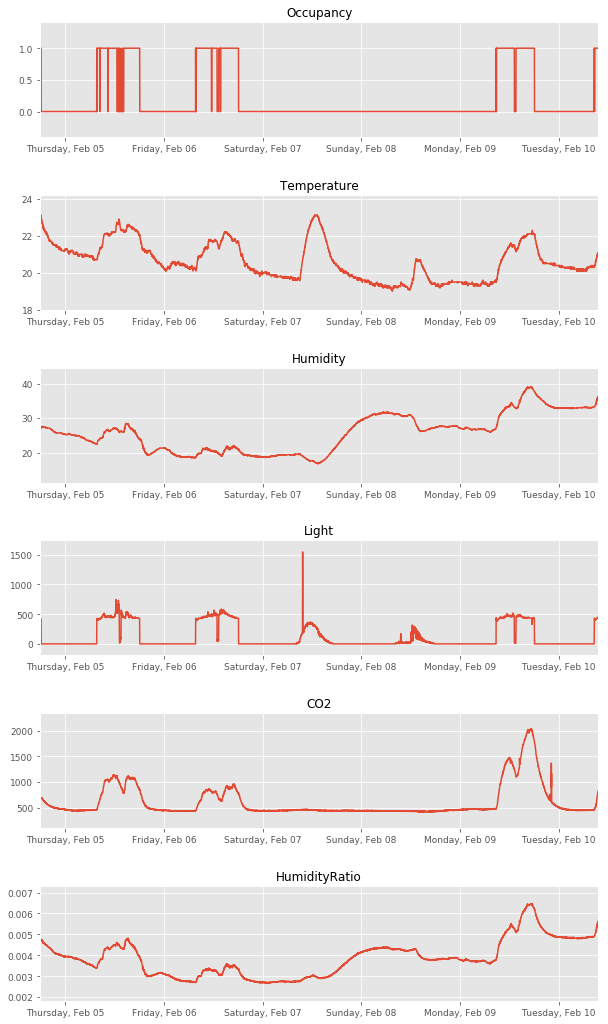

In [30]:
subset_features = vizTr[["Occupancy","Temperature","Humidity","Light","CO2","HumidityRatio"]]
n_features = len(subset_features.columns.values)

fig, axs = plt.subplots(n_features, figsize=(10, 18))

for i in range(0, n_features):
    plot_signal(axs[i],vizTr["date"],
                subset_features[subset_features.columns.values[i]],subset_features.columns.values[i])
plt.subplots_adjust(hspace=0.5)
plt.show()

## With Test Data 1

### Both the test datasets show similar trends. Whenever there is occupancy temperature, humidity, CO2 and humidity ratio increase. So, from the visualization of the data we can say that this data are reliable for further classification models.

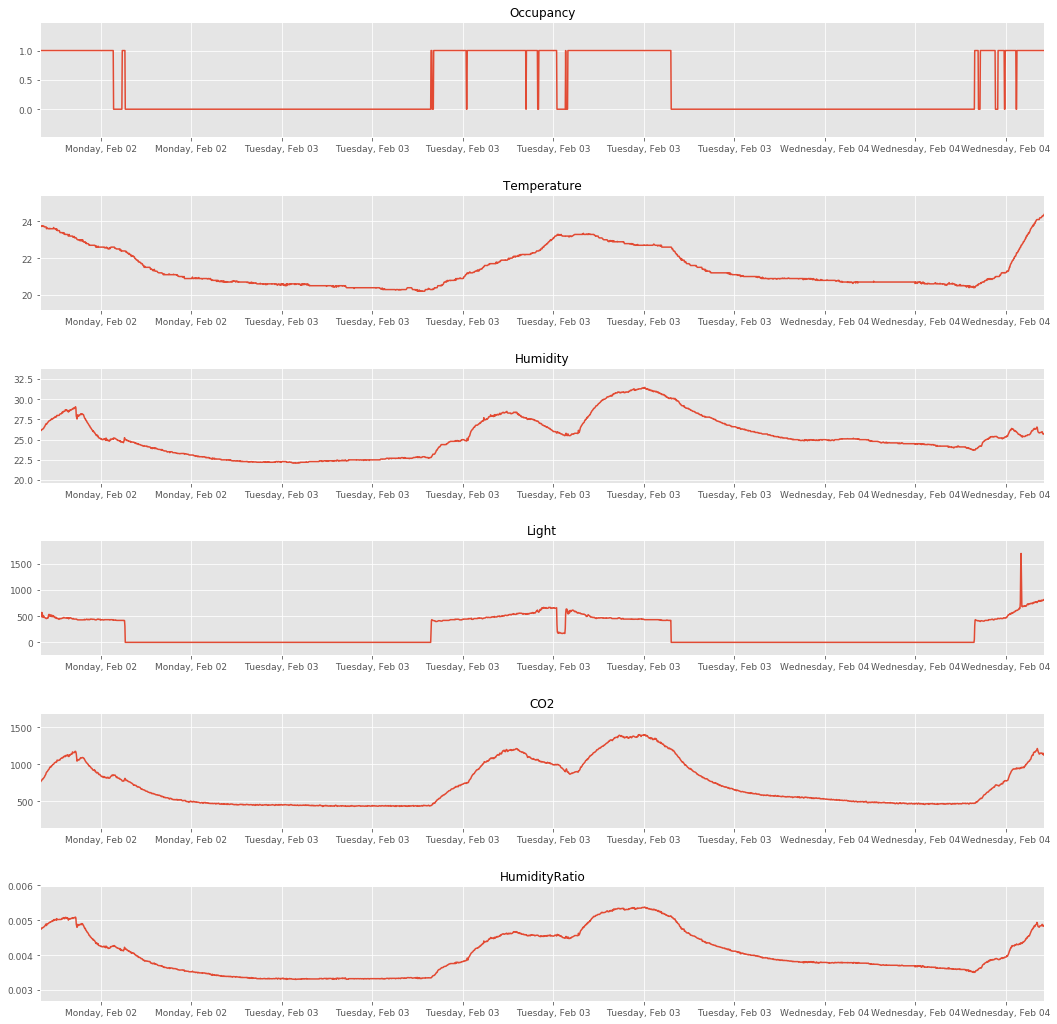

In [98]:
subset_features = vizData1[["Occupancy","Temperature","Humidity","Light","CO2","HumidityRatio"]]
n_features = len(subset_features.columns.values)

fig, axs = plt.subplots(n_features, figsize=(18, 18))

for i in range(0, n_features):
    plot_signal(axs[i],vizData1["date"],
                subset_features[subset_features.columns.values[i]],subset_features.columns.values[i])
plt.subplots_adjust(hspace=0.5)
plt.show()

## With Test Data 2

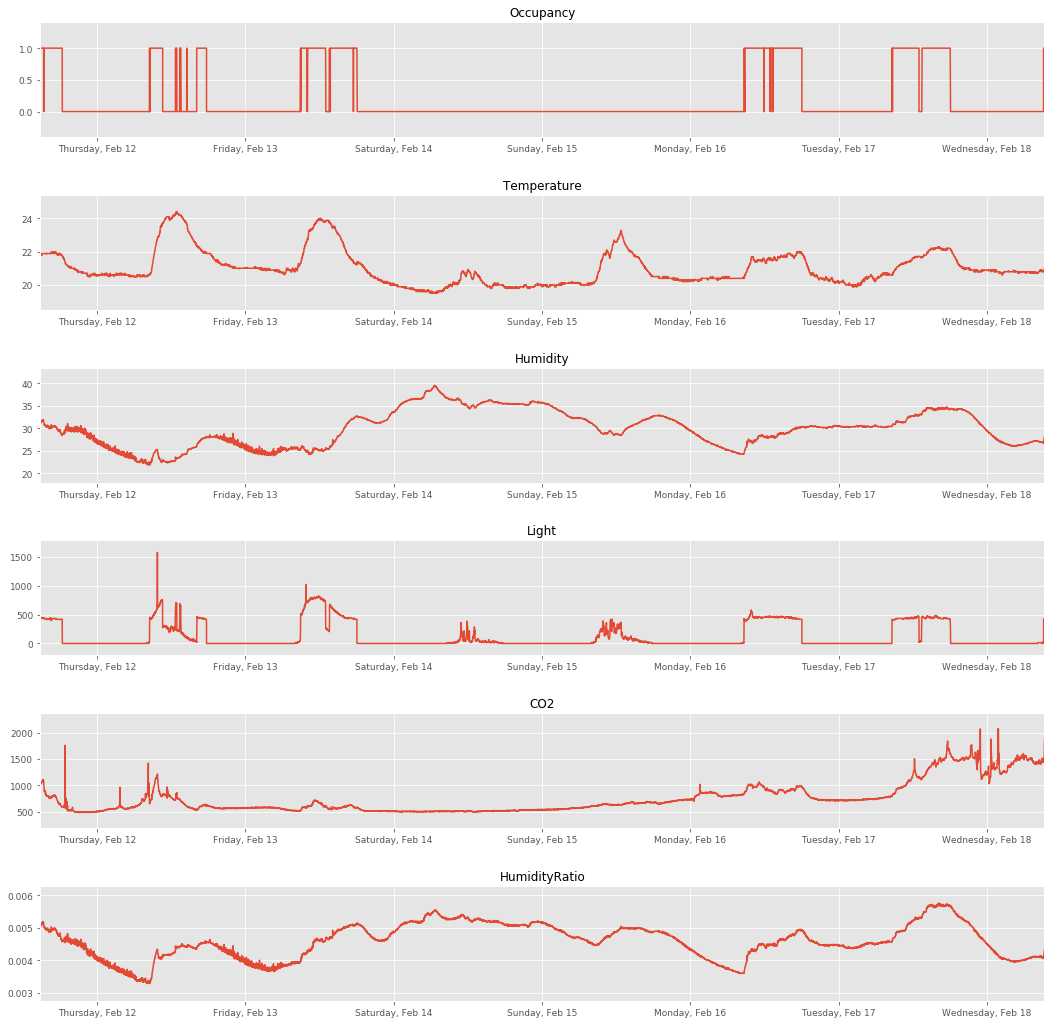

In [32]:
subset_features = vizData2[["Occupancy","Temperature","Humidity","Light","CO2","HumidityRatio"]]
n_features = len(subset_features.columns.values)

fig, axs = plt.subplots(n_features, figsize=(18, 18))

for i in range(0, n_features):
    plot_signal(axs[i],vizData2["Date"],
                subset_features[subset_features.columns.values[i]],subset_features.columns.values[i])
plt.subplots_adjust(hspace=0.5)
plt.show()

## Correlation between features
### From training and testing datasets we can see that there exist positive correlations between Temperature and Light (approx. 65%). Temperature and CO2 (approx. 60%) and negative correlations between Temperature and Humidity and Light and Humidity.

In [33]:
cols = OccupancyTraining.columns

In [34]:
for i in ['ID', 'label']:
    cols.remove(i)

In [35]:
df = OccupancyTraining.select(cols)

In [36]:
def printCorrelationForDataframe(dataframe):
    print("Correlation between: ")
    for i in cols:
        for j in cols:
            if (i!=j):
                print("\t" + i + " and " + j + " = ",dataframe.corr(i,j))

In [37]:
printCorrelationForDataframe(df)

Correlation between: 
	Temperature and Humidity =  -0.4022009595930284
	Temperature and Light =  0.567499727452477
	Temperature and CO2 =  0.5522329918791072
	Temperature and HumidityRatio =  -0.12737844489599506
	Humidity and Temperature =  -0.40220095959302865
	Humidity and Light =  -0.22896488712959218
	Humidity and CO2 =  -0.03384677776394644
	Humidity and HumidityRatio =  0.9580395772760004
	Light and Temperature =  0.5674997274524769
	Light and Humidity =  -0.22896488712959223
	Light and CO2 =  0.7110241680751203
	Light and HumidityRatio =  -0.08117999224874961
	CO2 and Temperature =  0.5522329918791076
	CO2 and Humidity =  -0.03384677776394646
	CO2 and Light =  0.7110241680751204
	CO2 and HumidityRatio =  0.14187607491231014
	HumidityRatio and Temperature =  -0.12737844489599492
	HumidityRatio and Humidity =  0.9580395772760004
	HumidityRatio and Light =  -0.08117999224874961
	HumidityRatio and CO2 =  0.14187607491231016


In [38]:
df = OccupancyData_2.select(cols)

In [39]:
printCorrelationForDataframe(df)

Correlation between: 
	Temperature and Humidity =  -0.5715860693508708
	Temperature and Light =  0.7099273712868962
	Temperature and CO2 =  0.26730435103612443
	Temperature and HumidityRatio =  -0.12388260377666245
	Humidity and Temperature =  -0.5715860693508704
	Humidity and Light =  -0.28593197783396945
	Humidity and CO2 =  -0.3573200248314661
	Humidity and HumidityRatio =  0.8835927059628416
	Light and Temperature =  0.7099273712868962
	Light and Humidity =  -0.28593197783396945
	Light and CO2 =  0.38956899082839996
	Light and HumidityRatio =  0.06099072710181173
	CO2 and Temperature =  0.26730435103612454
	CO2 and Humidity =  -0.3573200248314661
	CO2 and Light =  0.38956899082839985
	CO2 and HumidityRatio =  -0.2674158104297213
	HumidityRatio and Temperature =  -0.12388260377666258
	HumidityRatio and Humidity =  0.8835927059628415
	HumidityRatio and Light =  0.0609907271018117
	HumidityRatio and CO2 =  -0.26741581042972123


In [40]:
df = OccupancyData_1.select(cols)

In [41]:
printCorrelationForDataframe(df)

Correlation between: 
	Temperature and Humidity =  0.5681848287767287
	Temperature and Light =  0.645797672277713
	Temperature and CO2 =  0.8696196378194712
	Temperature and HumidityRatio =  0.8623460208250202
	Humidity and Temperature =  0.5681848287767286
	Humidity and Light =  0.3700058582255055
	Humidity and CO2 =  0.7796602776411932
	Humidity and HumidityRatio =  0.9058466831452238
	Light and Temperature =  0.6457976722777133
	Light and Humidity =  0.3700058582255054
	Light and CO2 =  0.7098471776418119
	Light and HumidityRatio =  0.5600029191556923
	CO2 and Temperature =  0.8696196378194712
	CO2 and Humidity =  0.7796602776411928
	CO2 and Light =  0.709847177641812
	CO2 and HumidityRatio =  0.9242915263959676
	HumidityRatio and Temperature =  0.8623460208250192
	HumidityRatio and Humidity =  0.9058466831452238
	HumidityRatio and Light =  0.5600029191556924
	HumidityRatio and CO2 =  0.9242915263959676


In [42]:
OccupancyTraining.describe('Temperature','Humidity','Light','CO2','label').show()

+-------+------------------+------------------+------------------+------------------+-------------------+
|summary|       Temperature|          Humidity|             Light|               CO2|              label|
+-------+------------------+------------------+------------------+------------------+-------------------+
|  count|              7165|              7165|              7165|              7165|               7165|
|   mean|20.457959525471075|24.852009769714208| 81.35663503140277|508.43546685275646|0.12826238660153524|
| stddev|0.9565506592085856| 5.043850267875856|163.55525063028136|134.18720594948988|0.33440507494290406|
|    min|              19.0|             16.75|               0.0|            412.75|                  0|
|    max|             23.18|             36.26|             829.0|             999.0|                  1|
+-------+------------------+------------------+------------------+------------------+-------------------+



In [43]:
OccupancyData_1.describe('Temperature','Humidity','Light','CO2','label').show()

+-------+------------------+------------------+------------------+------------------+-------------------+
|summary|       Temperature|          Humidity|             Light|               CO2|              label|
+-------+------------------+------------------+------------------+------------------+-------------------+
|  count|              2067|              2067|              2067|              2067|               2067|
|   mean|21.059279148524148|24.371432027092276| 108.9514368650217| 585.4530430575707|0.20029027576197386|
| stddev|0.7939853845424611|1.6004914179389853|201.91197481234178|167.11204968734683|0.40031438869227154|
|    min|              20.2|              22.1|               0.0|             427.5|                  0|
|    max|             23.76|              29.0|             767.0|            999.75|                  1|
+-------+------------------+------------------+------------------+------------------+-------------------+



In [44]:
OccupancyData_2.describe('Temperature','Humidity','Light','CO2','label').show()

+-------+------------------+------------------+------------------+------------------+-------------------+
|summary|       Temperature|          Humidity|             Light|               CO2|              label|
+-------+------------------+------------------+------------------+------------------+-------------------+
|  count|              8238|              8238|              8238|              8238|               8238|
|   mean|20.950000000001527|29.803625880069504|113.21782592862333| 641.4921680019422|0.17953386744355426|
| stddev|1.0760576474807138| 4.046180998418582|202.65785596884305|131.81652669304634| 0.3838220170672848|
|    min|              19.5|             21.86|               0.0|            484.67|                  0|
|    max|             24.39|              39.5|            820.67|            999.75|                  1|
+-------+------------------+------------------+------------------+------------------+-------------------+



In [45]:
OccupancyData_2.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- Temperature: double (nullable = true)
 |-- Humidity: double (nullable = true)
 |-- Light: double (nullable = true)
 |-- CO2: double (nullable = true)
 |-- HumidityRatio: double (nullable = true)
 |-- label: integer (nullable = true)



In [46]:
from pyspark.ml.classification import LogisticRegression

In [47]:
from pyspark.ml.feature import VectorAssembler
vectorAssembler = VectorAssembler(inputCols = ['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio'], outputCol = 'features')
OT = vectorAssembler.transform(OccupancyTraining)
OT = OT.select(['features', 'label'])
OT.show(3)

+--------------------+-----+
|            features|label|
+--------------------+-----+
|[23.18,27.27,426....|    1|
|[23.15,27.27,429....|    1|
|[23.15,27.25,426....|    1|
+--------------------+-----+
only showing top 3 rows



In [48]:
my_log_reg_model=LogisticRegression()
fitted_logreg_model= my_log_reg_model.fit(OT)
log_summary=fitted_logreg_model.summary
log_summary.predictions.printSchema()

root
 |-- features: vector (nullable = true)
 |-- label: double (nullable = true)
 |-- rawPrediction: vector (nullable = true)
 |-- probability: vector (nullable = true)
 |-- prediction: double (nullable = false)



In [49]:
log_summary.predictions.show(4)

+--------------------+-----+--------------------+--------------------+----------+
|            features|label|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|[23.18,27.27,426....|  1.0|[0.45837158904843...|[0.61262780077768...|       0.0|
|[23.15,27.27,429....|  1.0|[0.40238549679144...|[0.59926066618222...|       0.0|
|[23.15,27.25,426....|  1.0|[0.48664768944087...|[0.61931639628840...|       0.0|
|[23.15,27.2,426.0...|  1.0|[0.53007360241976...|[0.62950027839966...|       0.0|
+--------------------+-----+--------------------+--------------------+----------+
only showing top 4 rows



In [50]:
type(log_summary)

pyspark.ml.classification.BinaryLogisticRegressionTrainingSummary

In [51]:
from pyspark.ml.feature import VectorAssembler
vectorAssembler = VectorAssembler(inputCols = ['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio'], outputCol = 'features')
OTest1 = vectorAssembler.transform(OccupancyData_1)
OTest1 = OTest1.select(['features', 'label'])
OTest1.show(3)

+--------------------+-----+
|            features|label|
+--------------------+-----+
|[23.7,26.27,585.2...|    1|
|[23.72,26.29,578....|    1|
|[23.73,26.23,572....|    1|
+--------------------+-----+
only showing top 3 rows



In [52]:
prediction_and_labels=fitted_logreg_model.evaluate(OTest1)
prediction_and_labels.predictions.show(4)

+--------------------+-----+--------------------+--------------------+----------+
|            features|label|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|[23.7,26.27,585.2...|    1|[-2.5018278116556...|[0.07573014292761...|       1.0|
|[23.72,26.29,578....|    1|[-2.4145906931294...|[0.08206682848919...|       1.0|
|[23.73,26.23,572....|    1|[-2.3467561111768...|[0.08732395961205...|       1.0|
|[23.72,26.12,493....|    1|[-0.6540882709716...|[0.34206884708097...|       1.0|
+--------------------+-----+--------------------+--------------------+----------+
only showing top 4 rows



In [53]:
print("Accuracy: %s\nFPR: %s\nTPR: %s\nF-measure: %s\nPrecision: %s\nRecall: %s\nareaUnderROC: %s "
      % (prediction_and_labels.accuracy, prediction_and_labels.weightedFalsePositiveRate, prediction_and_labels.weightedTruePositiveRate, prediction_and_labels.weightedFMeasure(), prediction_and_labels.weightedPrecision, prediction_and_labels.weightedRecall,prediction_and_labels.areaUnderROC ))

Accuracy: 0.9743589743589743
FPR: 0.011853385048366505
TPR: 0.9743589743589745
F-measure: 0.9748627267178969
Precision: 0.9767826889777385
Recall: 0.9743589743589745
areaUnderROC: 0.9903776182084396 


### For this model, we got Accuracy as 97%. Precision and Recall for our model is also around 97%.
### Area under ROC curve comes around 0.99.
### From these values, we can say that the model is good.
### We tried to check if model is overfitted or not by comparing the false negative and false positive values, and we got less number of false positive and false negative values. 
### This shows that the logistic model works well for this dataset
### We can also change the threshold value for label in this type of regression to see how model reacts by change in false positive and false negative values.

In [54]:
from pyspark.ml.feature import VectorAssembler
vectorAssembler = VectorAssembler(inputCols = ['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio'], outputCol = 'features')
OTest2 = vectorAssembler.transform(OccupancyData_2)
OTest2 = OTest2.select(['features', 'label'])
OTest2.show(3)

+--------------------+-----+
|            features|label|
+--------------------+-----+
|[21.89,31.12,432....|    0|
|[21.89,31.15,436....|    1|
|[21.89,31.06,434....|    1|
+--------------------+-----+
only showing top 3 rows



In [55]:
prediction_and_labels_2=fitted_logreg_model.evaluate(OTest2)
prediction_and_labels_2.predictions.show(4)

+--------------------+-----+--------------------+--------------------+----------+
|            features|label|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|[21.89,31.12,432....|    0|[-3.6735904228805...|[0.02475670956091...|       1.0|
|[21.89,31.15,436....|    1|[-3.6215692914665...|[0.02604423897758...|       1.0|
|[21.89,31.06,434....|    1|[-3.4574777096187...|[0.03054663883617...|       1.0|
|[21.89,30.77,429....|    1|[-3.0535269080867...|[0.04506545079523...|       1.0|
+--------------------+-----+--------------------+--------------------+----------+
only showing top 4 rows



In [56]:
print("Accuracy: %s\nFPR: %s\nTPR: %s\nF-measure: %s\nPrecision: %s\nRecall: %s\nareaUnderROC: %s "
      % (prediction_and_labels_2.accuracy, prediction_and_labels_2.weightedFalsePositiveRate, prediction_and_labels_2.weightedTruePositiveRate, prediction_and_labels_2.weightedFMeasure(), prediction_and_labels_2.weightedPrecision, prediction_and_labels_2.weightedRecall,prediction_and_labels_2.areaUnderROC ))

Accuracy: 0.9910172371934935
FPR: 0.01781105158626324
TPR: 0.9910172371934935
F-measure: 0.9910337380918152
Precision: 0.9910597625333244
Recall: 0.9910172371934935
areaUnderROC: 0.9950567500163308 


### For this model, we got Accuracy as 99%. Precision and Recall for our model is also around 99%.
### Area under ROC curve comes around 0.99.
### From these values, we can say that the model is good.
### We tried to check if model is overfitted or not by comparing the false negative and false positive values, and we got less number of false positive and false negative values. 
### This shows that the logistic model works well for this dataset
### We can also change the threshold value for label in this type of regression to see how model reacts by change in false positive and false negative values.

In [57]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator

In [58]:
##Using Decision Trees
from pyspark.ml.feature import StringIndexer

In [59]:
indexer1 = StringIndexer(inputCol="label", outputCol="PrivateIndex")
output_fixed_train = indexer1.fit(OT).transform(OT)

In [60]:
train_data = output_fixed_train.select("features",'PrivateIndex')

In [61]:
indexer2 = StringIndexer(inputCol="label", outputCol="PrivateIndex")
output_fixed_test = indexer2.fit(OTest1).transform(OTest1)

In [62]:
indexer3 = StringIndexer(inputCol="label", outputCol="PrivateIndex")
output_fixed_test_2 = indexer3.fit(OTest2).transform(OTest2)

In [63]:
test_data = output_fixed_test.select("features",'PrivateIndex')

In [64]:
test_data_1 = output_fixed_test_2.select("features",'PrivateIndex')

In [65]:
from pyspark.ml.classification import DecisionTreeClassifier,GBTClassifier,RandomForestClassifier
from pyspark.ml import Pipeline

In [66]:
# Use mostly defaults to make this comparison "fair"

dtc = DecisionTreeClassifier(labelCol='PrivateIndex',featuresCol='features')
rfc = RandomForestClassifier(labelCol='PrivateIndex',featuresCol='features')
gbt = GBTClassifier(labelCol='PrivateIndex',featuresCol='features')

In [67]:
# Train the models (its three models, so it might take some time)
dtc_model = dtc.fit(train_data)
rfc_model = rfc.fit(train_data)
gbt_model = gbt.fit(train_data)

In [68]:
dtc_predictions = dtc_model.transform(test_data)
rfc_predictions = rfc_model.transform(test_data)
gbt_predictions = gbt_model.transform(test_data)

In [69]:
dtc_predictions_1 = dtc_model.transform(test_data_1)
rfc_predictions_1 = rfc_model.transform(test_data_1)
gbt_predictions_1 = gbt_model.transform(test_data_1)

In [70]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [71]:
# Select (prediction, true label) and compute test error
acc_evaluator = MulticlassClassificationEvaluator(labelCol="PrivateIndex", predictionCol="prediction", metricName="accuracy")

In [72]:
dtc_acc = acc_evaluator.evaluate(dtc_predictions)
rfc_acc = acc_evaluator.evaluate(rfc_predictions)
gbt_acc = acc_evaluator.evaluate(gbt_predictions)

In [73]:
dtc_acc_1 = acc_evaluator.evaluate(dtc_predictions_1)
rfc_acc_1 = acc_evaluator.evaluate(rfc_predictions_1)
gbt_acc_1 = acc_evaluator.evaluate(gbt_predictions_1)

In [74]:
print("Here are the results!")
print('-'*80)
print('A single decision tree had an accuracy of '+ str((dtc_acc*100))+ '  Error rate is ' + str(((1-dtc_acc)*100)))
print('-'*80)
print('A random forest ensemble had an accuracy of '+ str((rfc_acc*100))+ '  Error rate is ' + str(((1-rfc_acc)*100)))
print('-'*80)
print('A ensemble using GBT had an accuracy of '+ str((gbt_acc*100))+ '  Error rate is ' + str(((1-gbt_acc)*100)))

Here are the results!
--------------------------------------------------------------------------------
A single decision tree had an accuracy of 91.5336236090953  Error rate is 8.466376390904696
--------------------------------------------------------------------------------
A random forest ensemble had an accuracy of 92.25931301403  Error rate is 7.740686985970003
--------------------------------------------------------------------------------
A ensemble using GBT had an accuracy of 92.54958877600387  Error rate is 7.450411223996134


### Here for this testing dataset for Decision tree, we can see that Accuracy of the model is 91% and Error rate is around 8.5%. When compared to logistic regression, the accuracy here is less because in logistic regression, it classifies the data based on threshold value for label which will be 0 or 1. But in decision tree, it splits the data and it forms like a tree so there are chances of getting more number of false negatives and false positives. Same is the case with Random forest and Ensemble models which are implemented here.

In [75]:
print("Here are the results!")
print('-'*80)
print('A single decision tree had an accuracy of '+ str((dtc_acc_1*100))+ '  Error rate is ' + str(((1-dtc_acc_1)*100)))
print('-'*80)
print('A random forest ensemble had an accuracy of '+ str((rfc_acc_1*100))+ '  Error rate is ' + str(((1-rfc_acc_1)*100)))
print('-'*80)
print('A ensemble using GBT had an accuracy of '+ str((gbt_acc_1*100))+ '  Error rate is ' + str(((1-gbt_acc_1)*100)))

Here are the results!
--------------------------------------------------------------------------------
A single decision tree had an accuracy of 91.49065307113376  Error rate is 8.509346928866234
--------------------------------------------------------------------------------
A random forest ensemble had an accuracy of 93.74848264141782  Error rate is 6.2515173585821815
--------------------------------------------------------------------------------
A ensemble using GBT had an accuracy of 91.61204175770818  Error rate is 8.387958242291816
